In [1]:
import matplotlib.pyplot as plt
import numpy as np
from stock_market_env import StockMarketEnv
from trading_agent import LinearQTradingAgent

# Simulated stock prices
prices = np.random.randn(500) + 100  # Random walk stock prices
price_changes_pct = (prices[1:] / prices[:-1]) - 1

In [89]:
p = np.random.default_rng().normal(100, 1, 10)
[format(x, '.10f') for x in p]

['100.9805070101',
 '99.2774862212',
 '99.2756595406',
 '99.9227620151',
 '100.7791236669',
 '98.3064883226',
 '100.6972445875',
 '101.9630835699',
 '100.6207829189',
 '99.8995725134']

In [90]:
print(format(-6.87576437e+34, '.10f'))

-68757643700000002501143666735710208.0000000000


In [52]:
x = {0: 1.4, 1: 1.2, 2: 1.1}
x.pop(0)
x

{1: 1.2, 2: 1.1}

Target: 0.0, Q-value: 0.0, Action: 0, State: [-6.12606592e-03  1.00039333e+02  8.73925506e-01], Reward: 0, Next state: [6.85298346e-03 9.99626496e+01 8.39448274e-01], Next Q-values: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Error: 0.0, Weights: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], State: [-6.12606592e-03  1.00039333e+02  8.73925506e-01]
Target: 0.0, Q-value: 0.0, Action: 0, State: [6.85298346e-03 9.99626496e+01 8.39448274e-01], Reward: 0, Next state: [-4.19336283e-03  9.96649556e+01  5.33930847e-01], Next Q-values: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Error: 0.0, Weights: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], State: [6.85298346e-03 9.99626496e+01 8.39448274e-01]
Target: 0.0, Q-value: 0.0, Action: 0, State: [-4.19336283e-03  9.96649556e+01  5.33930847e-01], Reward: 0, Next state: [2.99104254e-03 9.99359727e+01 2.55752827e-01], Next Q-values: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Error: 0.0, Weights: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], State: [-4

/home/femiojo/code/projects/rl-for-trading/trading_agent_linear_approx/trading_agent.py:36: RuntimeWarning: overflow encountered in multiply
  self.weights[action] += self.alpha * error * state
/home/femiojo/code/projects/rl-for-trading/trading_agent_linear_approx/trading_agent.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  error = target - self._get_q_value(state, action)


Target: nan, Q-value: nan, Action: 2, State: [-4.17743037e-03  1.00304762e+02  5.05327486e-01], Reward: 0, Next state: [2.44082091e-03 1.00472452e+02 5.13208259e-01], Next Q-values: [np.float64(nan), np.float64(nan), np.float64(nan)]
Error: nan, Weights: [[nan nan nan]
 [nan nan nan]
 [nan nan nan]], State: [-4.17743037e-03  1.00304762e+02  5.05327486e-01]
Target: nan, Q-value: nan, Action: 2, State: [2.44082091e-03 1.00472452e+02 5.13208259e-01], Reward: 0, Next state: [-3.59677644e-03  1.00659721e+02  2.27393411e-01], Next Q-values: [np.float64(nan), np.float64(nan), np.float64(nan)]
Error: nan, Weights: [[nan nan nan]
 [nan nan nan]
 [nan nan nan]], State: [2.44082091e-03 1.00472452e+02 5.13208259e-01]
Target: nan, Q-value: nan, Action: 1, State: [-3.59677644e-03  1.00659721e+02  2.27393411e-01], Reward: -1, Next state: [-8.89768318e-03  1.00494096e+02  4.96367459e-01], Next Q-values: [np.float64(nan), np.float64(nan), np.float64(nan)]
Error: nan, Weights: [[nan nan nan]
 [nan nan n

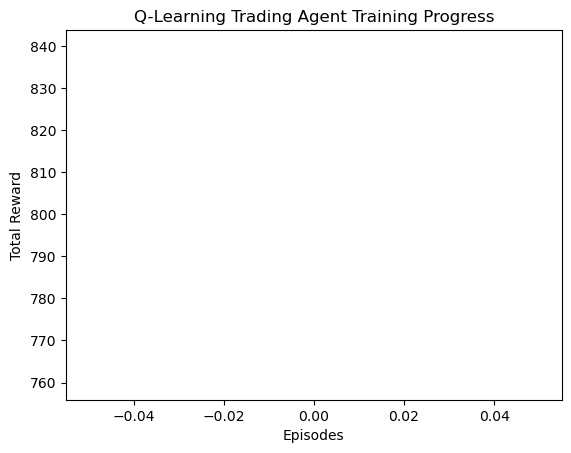

In [ ]:
# Create the environment
env = StockMarketEnv(prices[:3])

# Train the agent
state_size = 3  # 5 features: return, SMA, EMA, RSI, volatility
action_size = 3  # Actions: Buy, Hold, Sell
agent = LinearQTradingAgent(env, state_size, action_size)
rewards = agent.train(episodes=1)

print(agent.weights)

# Plot training progress
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Q-Learning Trading Agent Training Progress")
plt.show()


In [ ]:
rewards = agent.train(episodes=1000)

print(agent.weights)

# Plot training progress
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Q-Learning Trading Agent Training Progress")
plt.show()

Episode 0, Total Reward: -5.779960395108219, Epsilon: 0.0100
Episode 100, Total Reward: -27.166271844590995, Epsilon: 0.0100
Episode 200, Total Reward: 91.25584105472444, Epsilon: 0.0100
Episode 300, Total Reward: 180.53086078649017, Epsilon: 0.0100
Episode 400, Total Reward: -3, Epsilon: 0.0100
Episode 500, Total Reward: -1, Epsilon: 0.0100
Episode 600, Total Reward: -28.720169602461, Epsilon: 0.0100
Episode 700, Total Reward: -77.67641137220369, Epsilon: 0.0100
Episode 800, Total Reward: 52.887029580629076, Epsilon: 0.0100
Episode 900, Total Reward: -25.775894969881506, Epsilon: 0.0100


AttributeError: 'LinearQTradingAgent' object has no attribute 'q_table'

In [6]:
print(agent.weights)


[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [ ]:
prices = np.random.uniform(0, 10, 5) # Random walk stock prices
prices

array([2.32208128, 9.19562353, 7.35984651, 6.5657412 , 4.7785389 ])

In [7]:
env.prices

array([100.26961056,  98.80008711,  98.46228854,  98.32890243,
        99.84787353,  97.6017017 ,  96.96319583,  96.03291171,
        96.9149997 ,  97.08559153,  96.52210944,  95.90942777,
        95.12978089,  96.49592941,  97.73475276,  98.68810329,
       100.31714178,  99.59473505,  99.22707127,  99.97225519,
        98.69719572,  97.03893435,  96.50913288,  96.48149357,
        96.75264396,  96.94920933,  96.04972541,  95.84369672,
        95.52744419,  97.42700735,  96.35506363,  95.36745711,
        93.42797437,  93.62944789,  93.27287146,  93.18533665,
        96.16527655,  97.91408933,  96.60557578,  94.83303921,
        94.77428475,  95.41320164,  96.6017302 ,  96.33882051,
        97.2983515 ,  98.45021407,  96.54274301,  96.99594312,
        96.03593307,  96.99487635,  97.87126088, 100.78909253,
       102.38511769, 102.6266674 , 102.2281297 , 101.59219094,
       100.98973641, 102.21591556, 104.32518418, 103.68250376,
       103.18522112, 102.64927253, 101.50512747, 101.62

In [24]:
print(prices[1:])
print(prices[:-1])
print(prices[1:] / prices[:-1])

print(np.array([prices[1:]]))
tuplized = tuple(map(tuple, np.array([prices[1:]])))
print(tuplized)

test_dir = {
    tuplized: 1,
}

test_dir[tuplized]

[100.11090917 100.68725736  99.46731396  98.28597495]
[100.67165666 100.11090917 100.68725736  99.46731396]
[0.99442994 1.0057571  0.98788384 0.98812334]
[[100.11090917 100.68725736  99.46731396  98.28597495]]
((np.float64(100.1109091691082), np.float64(100.68725735641885), np.float64(99.46731395974697), np.float64(98.28597495302475)),)


1

In [6]:
def test_agent(agent, env):
    """Run a test episode with the trained agent"""
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = max(agent._get_q_values(state), key=agent._get_q_values(state).get)
        state, reward, done = env.step(action)
        total_reward += reward

    return total_reward

# Test the trained agent
final_reward = test_agent(agent, env)
print("Final Test Reward:", final_reward)

Final Test Reward: 3977.3597257638103
